In [1]:
#import necessary library file
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accessing dataset file
df=pd.read_csv('Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
df.shape

(6745, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [9]:
#finding the number of null values in the dataset column wise
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [11]:
#Finding the percentage of the null values present in dataset
df.isnull().sum()/df.shape[0]*100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [12]:
df["Request timestamp"].value_counts()

11/7/2016 8:37         6
11/7/2016 19:02        6
11/7/2016 17:57        6
11/7/2016 9:40         6
11/7/2016 20:47        5
                      ..
12/7/2016 20:00        1
13-07-2016 19:50:13    1
14-07-2016 20:45:13    1
15-07-2016 07:50:43    1
15-07-2016 10:07:19    1
Name: Request timestamp, Length: 5618, dtype: int64

In [13]:
df["Request timestamp"]=df["Request timestamp"].astype(str)
df["Request timestamp"]=df["Request timestamp"].replace("/","-")
df["Request timestamp"]=pd.to_datetime(df["Request timestamp"],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 316.3+ KB


In [14]:
df["Drop timestamp"]=pd.to_datetime(df["Drop timestamp"],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [15]:
df["Drop timestamp"]

0      2016-07-11 13:00:00
1      2016-07-11 18:47:00
2      2016-07-12 09:58:00
3      2016-07-12 22:03:00
4      2016-07-13 09:25:47
               ...        
6740                   NaT
6741                   NaT
6742                   NaT
6743                   NaT
6744                   NaT
Name: Drop timestamp, Length: 6745, dtype: datetime64[ns]

# Adding new features to the dataframe

In [16]:
# Adding the hour of request
req_hour=df["Request timestamp"].dt.hour

In [18]:
df["req_hour"]=req_hour

0       11
1       17
2        9
3       21
4        8
        ..
6740    23
6741    23
6742    23
6743    23
6744    23
Name: Request timestamp, Length: 6745, dtype: int64

In [20]:
#Adding the day of request
req_day=df["Request timestamp"].dt.day

In [22]:
df["req_day"]=req_day

In [23]:
df["Drop timestamp"].fillna(0)

0       2016-07-11 13:00:00
1       2016-07-11 18:47:00
2       2016-07-12 09:58:00
3       2016-07-12 22:03:00
4       2016-07-13 09:25:47
               ...         
6740                      0
6741                      0
6742                      0
6743                      0
6744                      0
Name: Drop timestamp, Length: 6745, dtype: object

In [26]:
#Inserting new feature timeslot to identify the request made in which timeslot of the day 
df["Time_Slot"]=0
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0


In [29]:
#Categorizing thee time slot based on the hour of the day the request was made
"""
<5           "Pre_morning"
5<=x<10   == "Morning Rush"
10<=x<17     'Day_time'
17<=x<22     "Evening rush"
else         "Late night"
"""
df.loc[df['req_hour'].between(0,5, inclusive=True),'Time_Slot'] = 'Pre_Morning'
df.loc[df['req_hour'].between(5,10, inclusive=True),'Time_Slot'] = 'Morning_Rush'
df.loc[df['req_hour'].between(10,17, inclusive=True),'Time_Slot'] = 'Day_Time'
df.loc[df['req_hour'].between(17,22, inclusive=True),'Time_Slot'] = 'Evening_Rush'
df.loc[df['req_hour'].between(22,24, inclusive=True),'Time_Slot'] = 'Late_Night'

In [30]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,11,Day_Time
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,11,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,12,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late_Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late_Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late_Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late_Night


In [31]:
df["Time_Slot"].value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Pre_Morning      578
Late_Night       498
Name: Time_Slot, dtype: int64

# DATA VISUALIZATION

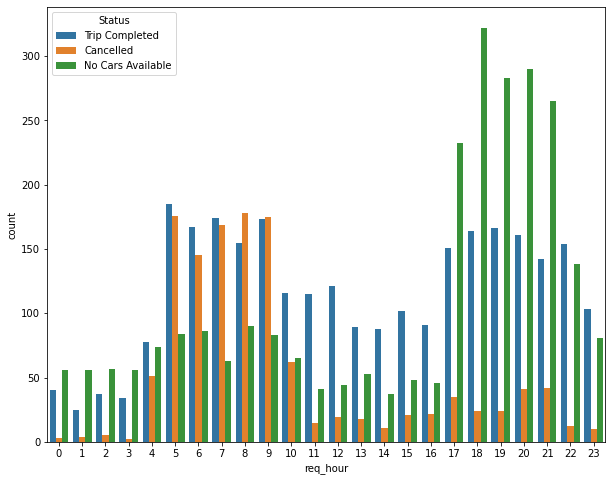

In [37]:
#Plotting the countplot based on the hour at which reuest was made with hue showing the status of the trip  
plt.figure(figsize=(10,8))
sns.countplot(x="req_hour",data=df,hue="Status")
plt.show()

<Figure size 720x576 with 0 Axes>

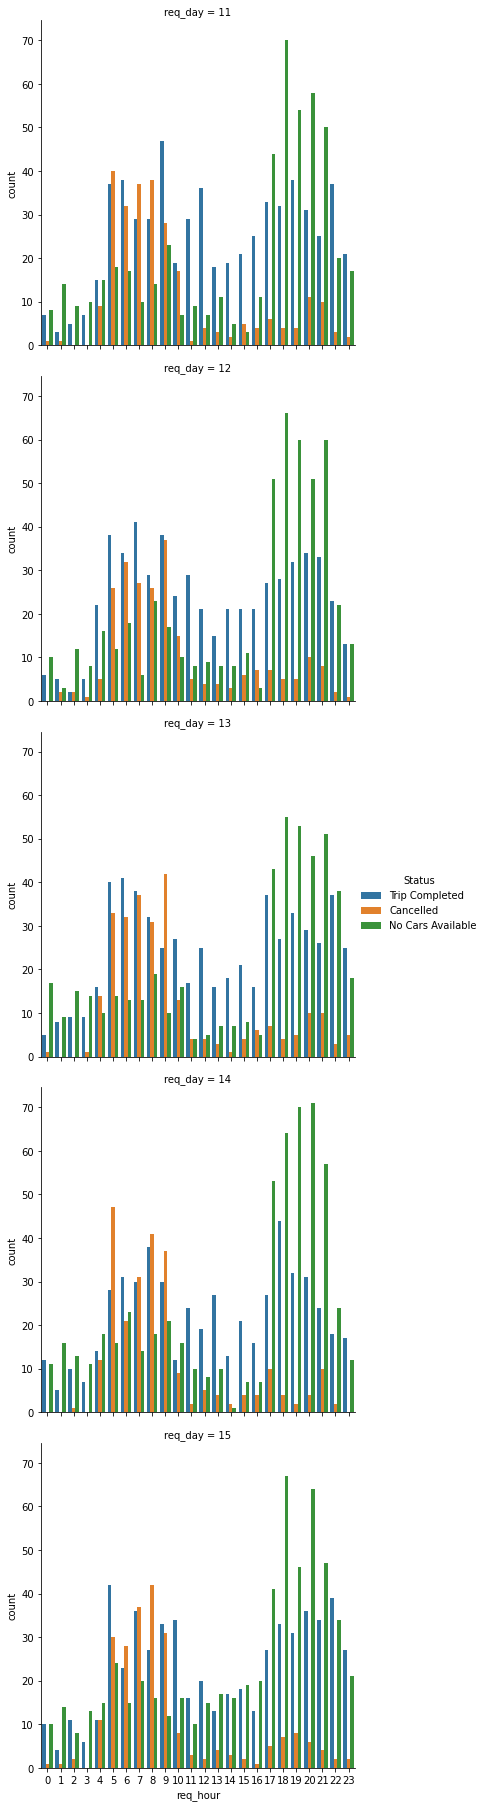

In [38]:
#Plotting the countplot based on the hour at which request was made on different days with hue showing the status of the trip  
plt.figure(figsize=(10,8))
sns.factorplot(x="req_hour",data=df,row="req_day",hue="Status",kind="count")
plt.show()

<Figure size 720x576 with 0 Axes>

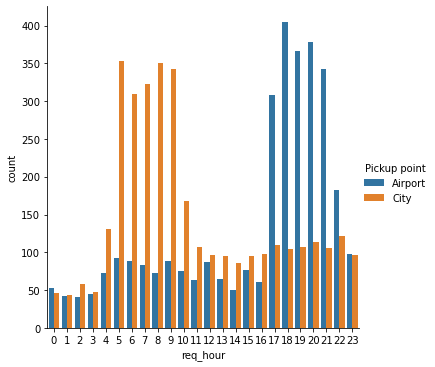

In [40]:
plt.figure(figsize=(10,8))
sns.factorplot(x="req_hour",data=df,hue="Pickup point",kind="count")
plt.show()

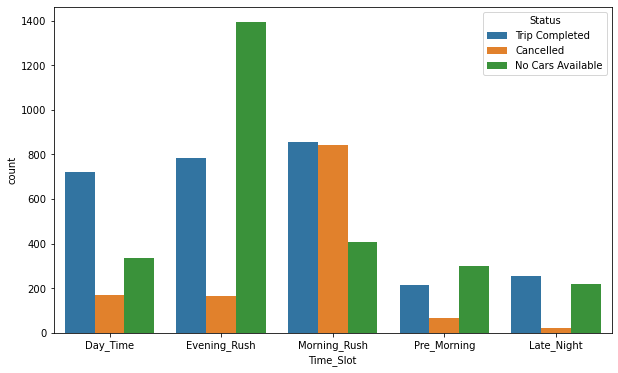

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x="Time_Slot",hue="Status",data=df)
plt.show()

In [46]:
df_morning_rush=df[df['Time_Slot']=='Morning_Rush']
df_morning_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush


<AxesSubplot:xlabel='Pickup point', ylabel='count'>

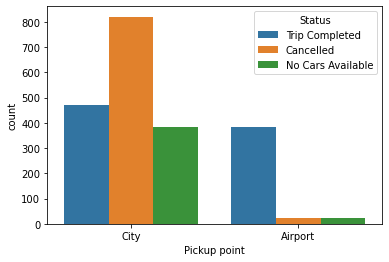

In [44]:
sns.countplot(x="Pickup point",hue="Status",data=df_morning_rush)

# cancellation of cab as per the pickup location at morning rush hours

Number of times the trip was cancelled and the pickup location was airport

In [47]:
df_airport_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")]
df_airport_cancelled.shape[0]

23

Number of times the trip was cancelleed and the pickup location was in city

In [48]:
df_city_cancelled=df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")]
df_city_cancelled.shape[0]

820

# Morning rush - Overview

In [49]:
df_morning_rush.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,req_hour,req_day,Time_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,12,Morning_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning_Rush
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Morning_Rush
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Morning_Rush
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,6,11,Morning_Rush


# Morning Rush (City)

In [51]:
#Number of times the trip request was made in morning within the city
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City")].shape[0]

1677

In [52]:
#Number of times the trip was completed in morning within the city
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

472

In [53]:
#Number of times the trip were cancelled in morning within the city

df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

820

In [54]:
#Number of times the cars were not availble for trips in morning within the city

df_morning_rush.loc[(df_morning_rush["Pickup point"]=="City") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

385

# Morning Rush - Airport

In [56]:
#Number of times the trip request was made from airport in morning rush hours
df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport")].shape[0]

426

In [57]:
#Number of times the trip was completed in morning rush hours starting from airport

df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Trip Completed")].shape[0]

382

In [58]:
#Number of times the trip were cancelled from airport during morning rush hours

df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="Cancelled")].shape[0]

23

In [59]:
#number of times the cars were not availble for trips requests made from airport in the morning rush hours

df_morning_rush.loc[(df_morning_rush["Pickup point"]=="Airport") & (df_morning_rush["Status"]=="No Cars Available")].shape[0]

21

# Evening rush - Overview

In [60]:
df_evening_rush=df[df['Time_Slot']=='Evening_Rush']

In [61]:
df_city_cancelled=df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")]

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

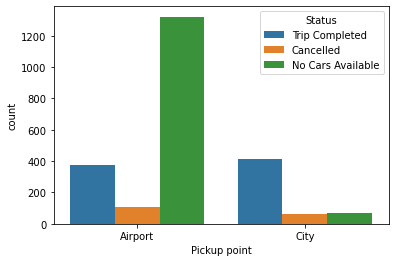

In [62]:
sns.countplot(x="Pickup point",hue="Status",data=df_evening_rush)

In [63]:
df_city_cancelled.shape[0]

60

In [64]:
df_evening_rush["Status"].value_counts()

No Cars Available    1392
Trip Completed        784
Cancelled             166
Name: Status, dtype: int64

# Evening rush - City
Number of times the trip request was made in evening rush hours within the city

In [65]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City")].shape[0]

542

In [66]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

60

In [67]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="City") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

71

# Evening rush - Airport

In [68]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport")].shape[0]

1800

In [69]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Trip Completed")].shape[0]

373

In [70]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="Cancelled")].shape[0]

106

In [71]:
df_evening_rush.loc[(df_evening_rush["Pickup point"]=="Airport") & (df_evening_rush["Status"]=="No Cars Available")].shape[0]

1321

# Pie chart

Morning Rush - City

In [72]:
df_morning_city = df.loc[(df["Pickup point"]=="City") & (df["Time_Slot"]=="Morning_Rush")]

In [75]:
df_morning_city_count = pd.DataFrame(df_morning_city["Status"].value_counts())

In [77]:
df_morning_city_count

,Status
Cancelled,820
Trip Completed,472
No Cars Available,385


In [78]:
df_morning_city_count["Status"].values

array([820, 472, 385])

In [79]:
df_morning_city_count["Status"].index

Index(['Cancelled', 'Trip Completed', 'No Cars Available'], dtype='object')

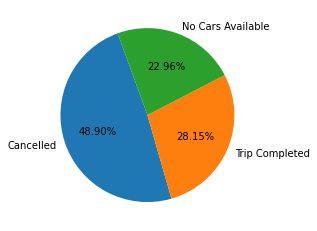

In [84]:
fig,ax= plt.subplots()
ax.pie(df_morning_city_count["Status"].values,labels=df_morning_city_count["Status"].index,autopct="%.2f%%", startangle=110)
plt.show()

# Evening rush - Airport

In [85]:
df_evening_airport = df.loc[(df["Pickup point"]=="Airport") & (df["Time_Slot"]=="Evening_Rush")]
df_evening_airport_count = pd.DataFrame(df_evening_airport["Status"].value_counts())
df_evening_airport_count

,Status
No Cars Available,1321
Trip Completed,373
Cancelled,106


In [86]:
df_evening_airport_count["Status"].values

array([1321,  373,  106])

In [88]:
df_evening_airport_count["Status"].index

Index(['No Cars Available', 'Trip Completed', 'Cancelled'], dtype='object')

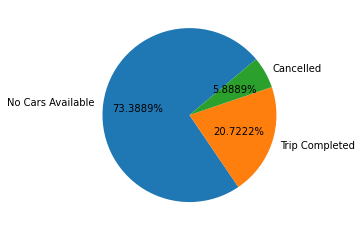

In [92]:
fig,ax= plt.subplots()
ax.pie(df_evening_airport_count["Status"].values,labels=df_evening_airport_count["Status"].index,autopct="%.4f%%", startangle=40)
plt.show()

# Conclusions based on Pickup points

1.Pickup Point - City : As per the analysis, the Pre_Morning time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city.

2.Pickup Point - Airport : Upon analysis, the Morning_Rush time slot seems to be most problematic for pickup points as airport where the reason for trip incompletion being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city.

# Recommendations

1.They could be given bonus for each trip they complete from the city to the airport in the evening rush . This will ensure that less number of trips are cancelled.

2.Uber can pay for the gas expenses to drivers to com back to city without a ride.
2.Drivers can be given the bonus for completing the trip from airport to city in the evening to bridge the gap betweeen demand and supply in the evening at airports

3.Uber can also pay drivers to come without a passenger to the airport.

4.Another way could be is to increase lisences of car pooling taxis so that lesser numbeer of cars can serve more customers